In [1]:
from demo_lib.utils import setImportPath
setImportPath()

from OZEngine.lib.utils import *


from OZEngine.edge_detectors import HED
from OZEngine.face_detectors import FaceDetector
import cv2

dress checker
OCR loaded!


2022-10-25 12:19:18.546869: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-25 12:19:18.648344: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-10-25 12:19:18.651305: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.10/dist-packages/cv2/../../lib64:
2022-10-25 12:19:18.651313: I tensorflo

In [2]:
img = cv2.imread('image/video_frame/fd_1/0.jpg')

HED_engine = HED()

hed_edge = HED_engine.detect_edge(img, 500, 500)
hed_edge_bgr = cv2.cvtColor(hed_edge, cv2.COLOR_GRAY2BGR)
hed_boxed_img = hed_edge_bgr


[RCF] loading...
[RCF] finished loading (0.0483 sec)


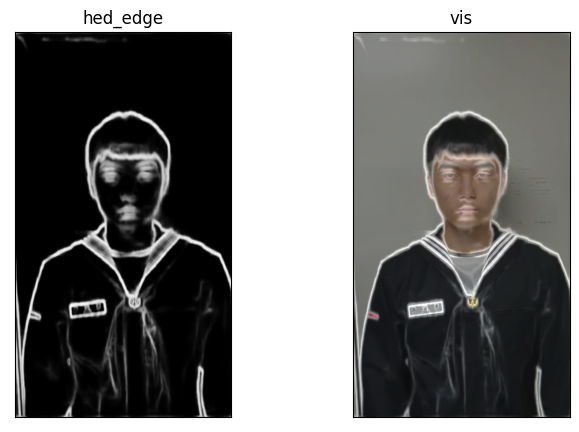

True

In [3]:
import numpy as np
added_image = cv2.addWeighted(img,0.6,hed_edge_bgr,0.5,0)

plt_imshow(['hed_edge', 'vis'], [hed_edge_bgr, added_image])
cv2.imwrite('hed_edge_1.jpg', hed_edge_bgr)
cv2.imwrite('hed_rpb_1.jpg', added_image)


(1280, 720)


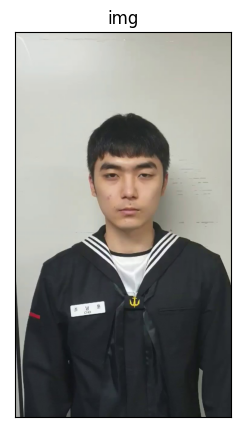

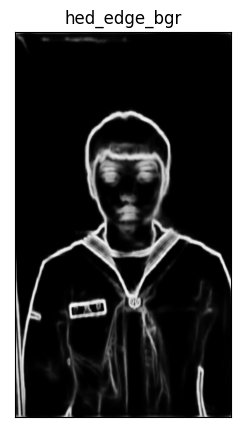

True

In [4]:


gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
print(gray.shape)

edge = cv2.Canny(gray, 50, 200)

contours, hierarchy = cv2.findContours(edge, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
contours, hierarchy = sortContoursByArea(contours, hierarchy)

for i, contour in enumerate(contours):
    if cv2.contourArea(contour) < 10:
        break
    color = list(np.random.random(size=3) * 256)
    # cv2.drawContours(img, [contour], -1, color, 3)

    tmp_box_position = cv2.boundingRect(contour)
    x,y,w,h = tmp_box_position

    roi = img[y:y+h, x:x+w]
    cv2.imwrite(f'for_demo/hed_parts/{i}.jpg', roi)
    # cv2.rectangle(img, (x, y), (x+w, y+h), color, 5)
    # cv2.rectangle(hed_edge_bgr, (x, y), (x+w, y+h), color, 5)

# edge_bgr = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

plt_imshow('img', img)
plt_imshow('hed_edge_bgr', hed_edge_bgr)

cv2.imwrite('img2.jpg', img)
cv2.imwrite('hed_edge_bgr.jpg', hed_edge_bgr)

In [5]:
from mtcnn import MTCNN

img = cv2.imread('image/video_frame/fd_1/0.jpg')

detector = detector = MTCNN()
detections = detector.detect_faces(img)

2022-10-25 12:19:21.047444: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.10/dist-packages/cv2/../../lib64:
2022-10-25 12:19:21.047461: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-25 12:19:21.047470: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:163] no NVIDIA GPU device is present: /dev/nvidia0 does not exist
2022-10-25 12:19:21.047578: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
img = cv2.imread('image/video_frame/fd_1/0.jpg')
s1_boxes = np.load('total_boxes_1.npy')

for s1_box in s1_boxes:
    s1_box = list(map(int, s1_box))
    a,b,c,d, va = s1_box
    if va > 70:
        cv2.rectangle(img, (a,b), (c,d), (0,255,0), 5)
    else:
        cv2.rectangle(img, (a,b), (c,d), (0,0,255), 5)
    
plt_imshow('box', img)
cv2.imwrite('p-net_img.jpg', img)

FileNotFoundError: [Errno 2] No such file or directory: 'total_boxes_1.npy'

In [ ]:
img = cv2.imread('image/video_frame/fd_1/0.jpg')
s2_boxes = np.load('total_boxes_2.npy')

for s1_box in s2_boxes:
    s1_box = list(map(int, s1_box))
    a,b,c,d, va = s1_box
    if va > 70:
        cv2.rectangle(img, (a,b), (c,d), (0,255,0), 5)
    else:
        cv2.rectangle(img, (a,b), (c,d), (0,0,255), 5)
    
plt_imshow('box', img)
cv2.imwrite('r-net_img.jpg', img)

In [ ]:
face_detector = FaceDetector()
img = cv2.imread('image/video_frame/fd_1/0.jpg')

face_box = face_detector.detect(img)
x,y,w,h = cvtPoint(face_box, method='2to4')

cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 5)
cv2.imwrite('o-net_img.jpg', img)